start
long bit
almost done
---------------------------------------------------
1952.txt
safeties 1
safeties 1
fellowmen 3
fellowmen 3
---------------------------------------------------
1953.txt
ablablabal 0
tangiwai 0
ablablabal 0
tangiwai 0
ablablabal 0
abla 1
abla 1
abl 6
abl 6
---------------------------------------------------
1954.txt
unenvied 0
unenvied 0
unenvied 0
adversities 8
adversities 8
illumined 15
illumined 15
illumined 15
envelops 22
dreariness 22
envelops 22
dreariness 22
envelops 22
dreariness 22
---------------------------------------------------
1955.txt
abababababa 0
abababababa 0
abababababa 0
littlest 14
littlest 14
littlest 14
---------------------------------------------------
1956.txt
abababababa 0
abababababa 0
abababababa 0
---------------------------------------------------
1957.txt
outworn 20
outworn 20
outworn 20
---------------------------------------------------
1958.txt
spacetravel 0
spacetravel 0
seaway 8
seaway 8
seaway 8
---------------------------

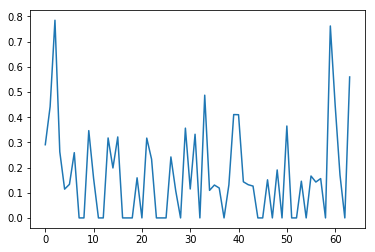

adjective:


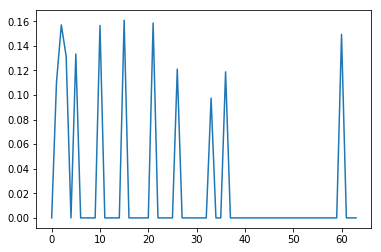

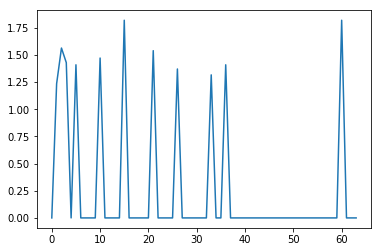

verb


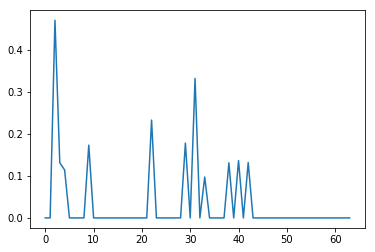

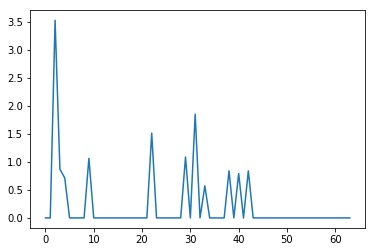

adjective and verb


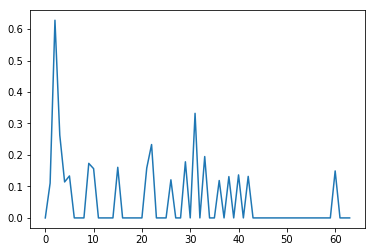

no noun


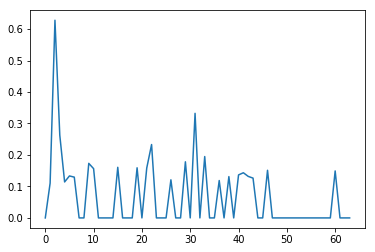

noun


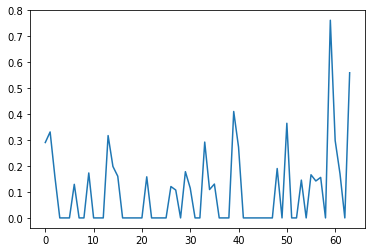

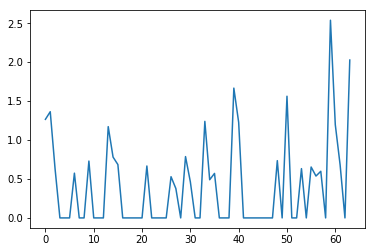

adverb


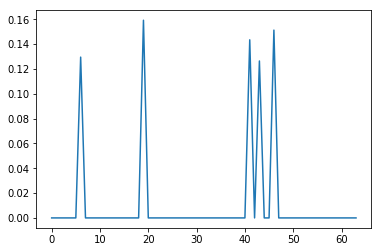

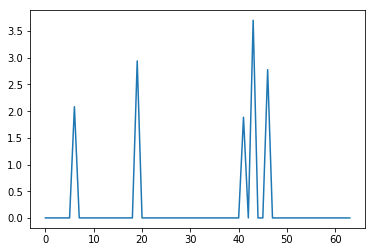

fdist
<FreqDist with 642057 samples and 111978070 outcomes>
len
642057
total_len
536


In [5]:
#access data from BNC for more accurate frequency analysis (for british english)
#takes a long time to run (a few hours) because of large amount of data and computation

#add average frequency per speech?

from __future__ import division
import nltk
import os
import string
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import brown
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.stem import WordNetLemmatizer
from nltk.corpus.reader.bnc import BNCCorpusReader
#from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder


def main():
    
    print('start')
    bnc_reader = BNCCorpusReader(root="C:\\Users\\annah\\Dropbox\\IMPERIAL\\INDIVIDUAL PROJECT\\jupyter_programs\\linguistic_analysis\\2554\\download\\Texts", 
                            fileids=r'[A-K]/\w*/\w*\.xml')
    
    list_of_fileids = []
    
    #calls function to append all files to list of fileids
    fill_list_of_fileids(list_of_fileids)        
    
    #accesses all words from files 
    words = bnc_reader.words(list_of_fileids)
    
    print('long bit')
    #generates the frequency of each word (all lowercase)
    #this is the part that takes a long time, due to large number of words
    fdist = nltk.FreqDist(w.lower() for w in words)
    print('almost done')
    
    #print(fdist.most_common(50))
               
    #set up Queen's speech corpus    
    newcorpus = PlaintextCorpusReader('data', '.*')
    files = newcorpus.fileids()
    
    # define punctuation
    punctuations = '''!()-–[]{};:'"“”\,<>’./?@#$%^&*_~'''
    
    lemmatizer = WordNetLemmatizer()
    
    count_list = []
    
    adj_count_list = []
    adj_count_adj_list = []
    
    verb_count_list = []
    verb_count_verb_list = []
    
    noun_count_list = []
    noun_count_noun_list = []
    
    no_noun_count_list = []
    
    adverb_count_list = []
    adverb_count_adverb_list = []
    
    
    #for each speech, look at frequency of words used (frequency according to BNC)
    for f in files:
        
        print('---------------------------------------------------')
        print(f)
        
        clean_list = []
        word_freq = []
        adj_list = []
        verb_list = []
        noun_list = []
        no_noun_list = []
        adverb_list = []
        
        #access and clean data
        str1 = clean_data(f, newcorpus)
        
        #tokenize and tag words
        text = nltk.word_tokenize(str1)
        pos_words = nltk.pos_tag(text)
            
        
        #for every word in speech, append to relevant list according to word-type tag
        for words in pos_words:            
            if words[0] not in punctuations: 
                clean_list.append(words[0])
                if (words[1] == 'JJ' or words[1] == 'JJR' or words[1] == 'JJS'):
                    adj_list.append(words[0])
                if (words[1] == 'VB' or words[1] == 'VBD' or words[1] == 'VBP') \
                or (words[1] == 'VBG' or words[1] == 'VBN' or words[1] == 'VBZ'):
                    verb_list.append(words[0])   
                if (words[1] == 'RB' or words[1] == 'RBR' or words[1] == 'RBS'):
                    adverb_list.append(words[0])
                
        for words in pos_words:            
            if words[0] not in punctuations:
                if (words[1] == 'NN' or words[1] == 'NNP' or words[1] == 'NNS'):
                    noun_list.append(words[0])    
                else:
                    no_noun_list.append(words[0])
            
        abs_freq_list = {}
        adj_freq_list = {}
        verb_freq_list = {}
        noun_freq_list = {}
        no_noun_freq_list = {}
        adverb_freq_list = {}
        
        #gets frequency stats for all words in speeches (TODO: compare frequency to BNC frequency)
        fdist_queen = nltk.FreqDist(w.lower() for w in newcorpus.words(f))
        
        #for each word in speech, get BNC frequency and add to dictionary {word :  BNC-frequency}
        #abs_freq_list is all words and their frequencies
        #additionally separate words into their respective word-types 
        
        for l in fdist_queen:
            if l in clean_list:    
                
                frequency = fdist[l]
                abs_freq_list.update({l : frequency}) 
                word_freq.append(frequency)
              
                if l in adj_list:
                    adj_freq_list.update({l : frequency})
                
                if l in verb_list:
                    verb_freq_list.update({l : frequency})
                
                if l in noun_list:
                    noun_freq_list.update({l : frequency})
               
                if l in no_noun_list:
                    no_noun_freq_list.update({l : frequency})
                    
                if l in adverb_list:
                    adverb_freq_list.update({l : frequency})
        
        
        low_freq_count = 0
        adj_freq_count = 0
        verb_freq_count = 0
        noun_freq_count = 0
        no_noun_freq_count = 0
        adverb_freq_count = 0
        
        #goes through each item in respective word-type lists, and counts the number of occurrences
        #of said word-types below a certain frequency
        
        #range can be altered for different frequency "cut-offs"
        #e.g. here, it will only count those words with frequencies < 200
        for num in range(25):
            for k, v in abs_freq_list.items():
                if v == num:
                    low_freq_count += 1
                    print(k, v)
                    
            for k, v in adj_freq_list.items():
                if v == num:
                    adj_freq_count += 1
                    print(k, v)
                    
            for k, v in verb_freq_list.items():
                if v == num:
                    verb_freq_count += 1
                    print(k, v)
                    
            for k, v in noun_freq_list.items():
                if v == num:
                    noun_freq_count += 1
                    print(k, v)
                    
            for k, v in no_noun_freq_list.items():
                if v == num:
                    no_noun_freq_count += 1
                    print(k, v)     
                    
            for k, v in adverb_freq_list.items():
                if v == num:
                    adverb_freq_count += 1
                    print(k, v)
        
        
        #proportion of low frequency words in each text appended to list
        #displayed on graph to see changes over time
        
        #LOW-COUNT-PROPORTION
        count_list.append((low_freq_count/len(text))*100)
        
       
        #ADJ-LOW-COUNT PROPORTION
        adj_count_list.append((adj_freq_count/len(text))*100)       
        adj_count_adj_list.append((adj_freq_count/len(adj_list))*100) 
       
    
        #VERB-LOW-COUNT PROPORTION
        verb_count_list.append((verb_freq_count/len(text))*100)      
        verb_count_verb_list.append((verb_freq_count/len(verb_list))*100) 
        
        
        #NOUN-LOW-COUNT PROPORTION
        noun_count_list.append((noun_freq_count/len(text))*100)       
        noun_count_noun_list.append((noun_freq_count/len(noun_list))*100) 
       
        #NO-NOUN PROPORTION
        no_noun_count_list.append((no_noun_freq_count/len(text))*100)

        
        #ADVERB PROPORTION
        adverb_count_list.append((adverb_freq_count/len(text))*100)        
        adverb_count_adverb_list.append((adverb_freq_count/len(adverb_list))*100)
       
    #displays proportion of words (all types) with lower frequency, spanning all speeches  
    plt.plot(count_list)
    plt.show()
       
    #ONLY ADJ
    print('adjective:')
    plt.plot(adj_count_list)
    plt.show()
    
    plt.plot(adj_count_adj_list)
    plt.show()
    
    #ONLY VERB
    print('verb')
    plt.plot(verb_count_list)
    plt.show()
    
    plt.plot(verb_count_verb_list)
    plt.show()
        
    #ADJ+VERB
    print('adjective and verb')
    a_v = [x + y for x, y in zip(adj_count_list, verb_count_list)]
    
    plt.plot(a_v)
    plt.show()   
    
    #EVERYTHING APART FROM NOUN
    print('no noun')
    plt.plot(no_noun_count_list)
    plt.show()   
           
    #ONLY NOUN
    print('noun')
    plt.plot(noun_count_list)
    plt.show()
    
    plt.plot(noun_count_noun_list)
    plt.show()
        
    #ADVERB
    print('adverb')
    plt.plot(adverb_count_list)
    plt.show()
    
    plt.plot(adverb_count_adverb_list)
    plt.show()
    
    
    
    #proportion of low frequency verbs/ total number of verbs! (do-able?)
    
    print('fdist') 
    print(fdist)
    print('len')
    print(len(fdist))
    print('total_len')
    print(len(text))



def fill_list_of_fileids(list_of_fileids):    
    #accesses all text files from the British National Corpus and adds to list of files for frequency analysis 
    
    for root, dirs, files in os.walk(os.path.abspath("C:\\Users\\annah\\Dropbox\\IMPERIAL\\INDIVIDUAL PROJECT\\jupyter_programs\\linguistic_analysis\\2554\\download\\Texts\\A")):
        for file in files:
            new_dirs = (os.path.join(root, file))
            #print (new_dirs)
            list_of_fileids.append(new_dirs)

    for root, dirs, files in os.walk(os.path.abspath("C:\\Users\\annah\\Dropbox\\IMPERIAL\\INDIVIDUAL PROJECT\\jupyter_programs\\linguistic_analysis\\2554\\download\\Texts\\B")):
        for file in files:
            new_dirs = (os.path.join(root, file))
            #print (new_dirs)
            list_of_fileids.append(new_dirs)
    
    for root, dirs, files in os.walk(os.path.abspath("C:\\Users\\annah\\Dropbox\\IMPERIAL\\INDIVIDUAL PROJECT\\jupyter_programs\\linguistic_analysis\\2554\\download\\Texts\\C")):
        for file in files:
            new_dirs = (os.path.join(root, file))
            #print (new_dirs)
            list_of_fileids.append(new_dirs)
    
    for root, dirs, files in os.walk(os.path.abspath("C:\\Users\\annah\\Dropbox\\IMPERIAL\\INDIVIDUAL PROJECT\\jupyter_programs\\linguistic_analysis\\2554\\download\\Texts\\D")):
        for file in files:
            new_dirs = (os.path.join(root, file))
            #print (new_dirs)
            list_of_fileids.append(new_dirs)
    
    for root, dirs, files in os.walk(os.path.abspath("C:\\Users\\annah\\Dropbox\\IMPERIAL\\INDIVIDUAL PROJECT\\jupyter_programs\\linguistic_analysis\\2554\\download\\Texts\\E")):
        for file in files:
            new_dirs = (os.path.join(root, file))
            #print (new_dirs)
            list_of_fileids.append(new_dirs)
            
    for root, dirs, files in os.walk(os.path.abspath("C:\\Users\\annah\\Dropbox\\IMPERIAL\\INDIVIDUAL PROJECT\\jupyter_programs\\linguistic_analysis\\2554\\download\\Texts\\F")):
        for file in files:
            new_dirs = (os.path.join(root, file))
            #print (new_dirs)
            list_of_fileids.append(new_dirs)
            
    for root, dirs, files in os.walk(os.path.abspath("C:\\Users\\annah\\Dropbox\\IMPERIAL\\INDIVIDUAL PROJECT\\jupyter_programs\\linguistic_analysis\\2554\\download\\Texts\\G")):
        for file in files:
            new_dirs = (os.path.join(root, file))
            #print (new_dirs)
            list_of_fileids.append(new_dirs)
    
    for root, dirs, files in os.walk(os.path.abspath("C:\\Users\\annah\\Dropbox\\IMPERIAL\\INDIVIDUAL PROJECT\\jupyter_programs\\linguistic_analysis\\2554\\download\\Texts\\H")):
        for file in files:
            new_dirs = (os.path.join(root, file))
            #print (new_dirs)
            list_of_fileids.append(new_dirs)
            
    for root, dirs, files in os.walk(os.path.abspath("C:\\Users\\annah\\Dropbox\\IMPERIAL\\INDIVIDUAL PROJECT\\jupyter_programs\\linguistic_analysis\\2554\\download\\Texts\\I")):
        for file in files:
            new_dirs = (os.path.join(root, file))
            #print (new_dirs)
            list_of_fileids.append(new_dirs)
            
    for root, dirs, files in os.walk(os.path.abspath("C:\\Users\\annah\\Dropbox\\IMPERIAL\\INDIVIDUAL PROJECT\\jupyter_programs\\linguistic_analysis\\2554\\download\\Texts\\J")):
        for file in files:
            new_dirs = (os.path.join(root, file))
            #print (new_dirs)
            list_of_fileids.append(new_dirs)
            
    for root, dirs, files in os.walk(os.path.abspath("C:\\Users\\annah\\Dropbox\\IMPERIAL\\INDIVIDUAL PROJECT\\jupyter_programs\\linguistic_analysis\\2554\\download\\Texts\\K")):
        for file in files:
            new_dirs = (os.path.join(root, file))
            #print (new_dirs)
            list_of_fileids.append(new_dirs)
            
def clean_data(f, newcorpus):
    
    #cleans and preps data for analysis 
    
    # define punctuation
    punctuations = '''!()-–[]{};:'"“”\,<>’./?@#$%^&*_~'''

    lemmatizer = WordNetLemmatizer()

    #get raw text
    raw_text = newcorpus.raw(f)
    #get words (between white spaces)
    words = raw_text.split()  
        
    #strip punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
        
    #strip non-alphabetics
    alpha_stripped = [word for word in stripped if word.isalpha()]
        
    #convert everything to lower case
    lower_stripped = [word.lower() for word in alpha_stripped]
                
    #lemmatise
    #list_v = ([lemmatizer.lemmatize(t) for t in lower_stripped])
        
    #convert list back to string
    str1 = ' '.join(lower_stripped)
    return str1
 
    
if __name__ == "__main__":
    
    main()


In [2]:
jupyter notebook --generate-config

SyntaxError: invalid syntax (<ipython-input-2-ce48075e8c16>, line 1)